# Linear Regression with SciKit-Learn

This method is added in addition to the statsmodel package that is used in the other file. So, the plotting and correlation matrix that were analyzed thoroughly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
df=df_raw.copy()
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.rename(columns={'Price':'price','Age_08_04':'age', 'KM':'km', 'HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'qtrly_tax','Weight':'weight'}, inplace = True)
df

,price,age,km,hp,cc,doors,gears,qtrly_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [3]:
# Using our knowledge from the previous method.
df = df.drop(df.index[[221,960]],axis=0).reset_index()

In [4]:
X = df.drop('price',axis=1)
y = df['price']

## Train | Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
X_train

,index,age,km,hp,cc,doors,gears,qtrly_tax,weight
540,541,54,46230,110,1600,3,5,85,1055
268,269,39,48945,110,1600,3,5,69,1040
264,265,38,49500,110,1600,5,5,85,1075
890,891,68,61100,110,1600,5,5,85,1075
298,299,39,40000,110,1600,3,5,85,1055
...,...,...,...,...,...,...,...,...,...
1353,1355,69,60050,110,1600,3,5,69,1050
34,34,22,41000,97,1400,3,5,85,1100
746,747,65,81192,110,1600,3,6,85,1065
882,883,65,61384,110,1600,3,5,69,1050


In [8]:
y_train

540     12450
268     10950
264     11950
890     11500
298     13750
        ...  
1353     6750
34      15500
746     10950
882      8250
1398     7450
Name: price, Length: 1075, dtype: int64

In [9]:
X_test

,index,age,km,hp,cc,doors,gears,qtrly_tax,weight
573,574,49,34890,97,1400,3,5,69,1025
1377,1379,74,56132,110,1600,4,5,69,1035
322,323,44,36066,110,1600,3,5,69,1040
791,792,68,74875,110,1600,5,5,85,1070
978,980,57,45000,110,1600,5,5,69,1050
...,...,...,...,...,...,...,...,...,...
590,591,53,26624,97,1400,5,5,85,1060
1320,1322,79,66855,110,1600,5,5,85,1075
507,508,50,54465,110,1600,5,5,85,1075
931,932,60,55085,107,1600,5,5,85,1105


In [10]:
y_test

573      9980
1377     7750
322     11250
791      7750
978     10750
        ...  
590     10950
1320     8950
507     10500
931     10350
657      9950
Name: price, Length: 359, dtype: int64

## Building the Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [14]:
test_predictions = model.predict(X_test)
test_predictions

array([ 11144.14117756,   7992.56237358,  11841.29189676,   9255.82906276,
        10397.71606242,   7797.21433638,  17533.39931259,   7687.02378343,
         8683.64667687,  12204.49407896,  13157.74168843,  11568.64678246,
        11323.99637135,  16874.1701439 ,   8989.30430044,  15203.98145915,
         7194.81414663,   7787.43842429,  16958.75543113,   9757.03292604,
        18818.50983956,   8339.1548422 ,   8619.81947907,   7376.83160322,
         8782.51323149,   9461.88426635,   9524.03723017,  10019.71791761,
        14978.32584246,  13060.45235905,  14108.48427101,  13102.54275762,
        13926.27595613,  10727.81568346,   9675.76012962,   9213.94234905,
        10178.2389495 ,  10095.29015517,   8568.38820634,   8964.352191  ,
        10770.422968  ,  16013.8501381 ,   7744.49867048,   7331.66330094,
         9850.40649529,   9018.57030472,  10764.10417291,  10453.96392241,
        12661.05600478,   7753.61784785,  11591.79639582,  14082.67655125,
         9842.0354941 ,  

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [17]:
d1 = {'Errors':['Mean Absolute Error (MAE)','Mean Squared Error (MSE)','Root Mean Squared Error (RMSE)'],'Value':[MAE,MSE,RMSE]}
errors_df = pd.DataFrame(d1)  
errors_df

,Errors,Value
0,Mean Absolute Error (MAE),1.033527e+03
1,Mean Squared Error (MSE),9.854925e+06
2,Root Mean Squared Error (RMSE),3.139255e+03


Such low values of error points at a good model.

-----------

## Retraining Model on Full Data

In [18]:
final_model = LinearRegression()

In [19]:
final_model.fit(X,y)

LinearRegression()

It may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

### Final Model Fit

In [20]:
y_hat = final_model.predict(X)

#### Residuals

In [21]:
residuals = y_hat - y

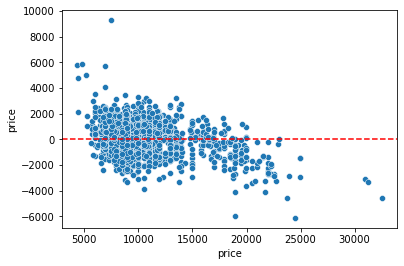

In [22]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Final Model - Coefficients

In [23]:
final_model.coef_

array([ 4.71476072e-01, -1.27354724e+02, -1.97632407e-02,  2.76437104e+01,
       -2.17304642e-01, -5.98644774e+01,  6.04795176e+02, -4.33809026e-01,
        2.30364979e+01])

In [24]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
index,0.471476
age,-127.354724
km,-0.019763
hp,27.643710
cc,-0.217305
doors,-59.864477
gears,604.795176
qtrly_tax,-0.433809
weight,23.036498


Coefficient of a variable display how much change is manifested in the Price with one unit change in the respective variable, given that all other features are fixed.